In [1]:
# # python3 /home/rnb/Projects/rnb-planning/src/pkg/planning/filtering/lattice_model/shared_lattice_predictor.py --rtype panda

# import SharedArray as sa
# ROBOT_TYPE_NAME = 'panda'
# sa.delete("shm://{}.prepared".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.grasp_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.arm_img".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.rh_vals".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.result".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_in".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.response_out".format(ROBOT_TYPE_NAME))
# sa.delete("shm://{}.query_quit".format(ROBOT_TYPE_NAME))

In [1]:
from __future__ import print_function
import os
import sys
RNB_PLANNING_DIR = os.environ["RNB_PLANNING_DIR"]
sys.path.append(os.path.join(RNB_PLANNING_DIR, 'src'))
from pkg.controller.combined_robot import *
from pkg.utils.utils import get_now, try_mkdir
import subprocess

DATA_PATH = os.path.join(RNB_PLANNING_DIR, "data")
try_mkdir(DATA_PATH)

DAT_ROOT = "stowing-deep"
TEST_DATA_PATH = os.path.join(DATA_PATH, DAT_ROOT)
try_mkdir(TEST_DATA_PATH)

IK_NUMS = [1,2,4,8, 10, 12, 14, 16,32,64]
RESULT_PATHS = []
for ik_num in IK_NUMS:
    RES_ROOT = "IK_MP_analysis_bak_0906/stowing-deep-result-new-lcheck-mvik{}".format(ik_num)
    TEST_RESULT_PATH = os.path.join(DATA_PATH, RES_ROOT)
    try_mkdir(TEST_RESULT_PATH)
    RESULT_PATHS.append(RES_ROOT)

HEADS = ["plan_time", "length", "MP_count", "failed_MPs", "IK_count", "failed_IKs", "success"]

def run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=['None', 'Tool', 'ToolReach', 'Full']):
    N_DAT = I_END-I_START
    ROBOT_DATA_ROOT = os.path.join(TEST_DATA_PATH, RTYPE)
    DATASET_PATH = os.path.join(ROBOT_DATA_ROOT, DAT_DIR)
    file_list = sorted(os.listdir(DATASET_PATH))

    gtimer = GlobalTimer.instance()
    gtimer.reset(scale=1, timeunit='s')

    gtimer.tic("full_loop")
    for fid in range(I_START, I_END):
        e_step_list = []
        for i_c, cname in enumerate(CNAME_LIST):
            gtimer.tic("step")
            p = subprocess.Popen(['python', '{}src/scripts/developing/pddlstream/test_saved_scene.py'.format(RNB_PLANNING_DIR),
                                  '--data_idx', str(fid), '--file_option', FILE_OPTION, '--cname', cname,]
                                 + common_args)
            p.wait()
            e_step = np.round(gtimer.toc("step"), 1)
            e_step_list.append(e_step)
            print("------- " + ("{:<8}"*len(e_step_list)).format(*e_step_list) + "-------", end="\r")

        print("")
        print("========== {} / {} (eta: {} / {} s) =========".format(
            fid+1, N_DAT, *np.round(gtimer.eta("full_loop", fid-I_START+1, N_DAT), 1)))

## Common params

In [2]:
RTYPE = "panda"
DAT_DIR = '20210917-113211'
I_START = 0
I_END = 50


CNAME_LIST = ['None']
# CNAME_LIST = ['Full'] #,'Pairwise']
VISUALIZE = False
PLAY_RESULT = False
SHOW_STATE = False

TIMEOUT_MOTION = 5
MAX_TIME = 100
MAX_ITER = 100

GRASP_SAMPLE = 30
STABLE_SAMPLE = 50
SEARCH_SAMPLE_RATIO= 100
MAX_SKELETONS = 30
TIMED_COMPLETE = False
STACK_TIMELOG = True
IK_TRY_NUM = 30
VERBOSE = False
USE_MOVEIT_IK = True


common_args = [
            '--rtype', RTYPE,
            '--dat_root', DAT_ROOT,
            '--res_root', RES_ROOT,
            '--dat_dir', DAT_DIR,
            '--VISUALIZE', str(VISUALIZE),
            '--PLAY_RESULT', str(PLAY_RESULT),
            '--TIMEOUT_MOTION', str(TIMEOUT_MOTION),
            '--MAX_TIME', str(MAX_TIME),
            '--MAX_ITER', str(MAX_ITER), 
            '--GRASP_SAMPLE', str(GRASP_SAMPLE),
            '--STABLE_SAMPLE', str(STABLE_SAMPLE),
            '--SEARCH_SAMPLE_RATIO', str(SEARCH_SAMPLE_RATIO),
            '--MAX_SKELETONS', str(MAX_SKELETONS),
            '--TIMED_COMPLETE', str(TIMED_COMPLETE),
            '--STACK_TIMELOG', str(STACK_TIMELOG),
            '--IK_TRY_NUM', str(IK_TRY_NUM),
            '--VERBOSE', str(VERBOSE),
            '--USE_MOVEIT_IK', str(USE_MOVEIT_IK)]

## plot results

In [3]:
from plot_scripts import *

In [4]:
try:
    resdat_all_accum = defaultdict(dict)
    CHECKERS = []
    for ik_num in IK_NUMS:
        resdat_all, res_dict_all = print_results(RES_ROOT="IK_MP_analysis_bak_0906/stowing-deep-result-new-lcheck-mvik{}".format(ik_num), 
                                                 RTYPE="panda", 
                                                 DAT_DIR='20210917-113211',
                                                 CNAMES_EXCLUDE=[], read_only=True
                                                )
        cname_cur = "{:03}".format(ik_num)
        CHECKERS.append(cname_cur)
        for key in resdat_all.keys():
            resdat_all_accum[key][cname_cur]=resdat_all[key]["None"]
except Exception as e:
    TextColors.RED.println("ERROR: "+str(e))
    TextColors.RED.println('If you have not run the test script on this computer yet, please run "test loop" section below')

RES_ROOT: IK_MP_analysis_bak_0906/stowing-deep-result-new-lcheck-mvik1
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: IK_MP_analysis_bak_0906/stowing-deep-result-new-lcheck-mvik2
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: IK_MP_analysis_bak_0906/stowing-deep-result-new-lcheck-mvik4
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: IK_MP_analysis_bak_0906/stowing-deep-result-new-lcheck-mvik8
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: IK_MP_analysis_bak_0906/stowing-deep-result-new-lcheck-mvik10
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: IK_MP_analysis_bak_0906/stowing-deep-result-new-lcheck-mvik12
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Tool', 'ToolReach', 'Full']
RES_ROOT: IK_MP_analysis_bak_0906/stowing-deep-result-new-lcheck-mvik14
DAT_DIR: 20210917-113211
CNAME_LIST: ['None', 'Too

Text(0.5,1,'success ratios tot')

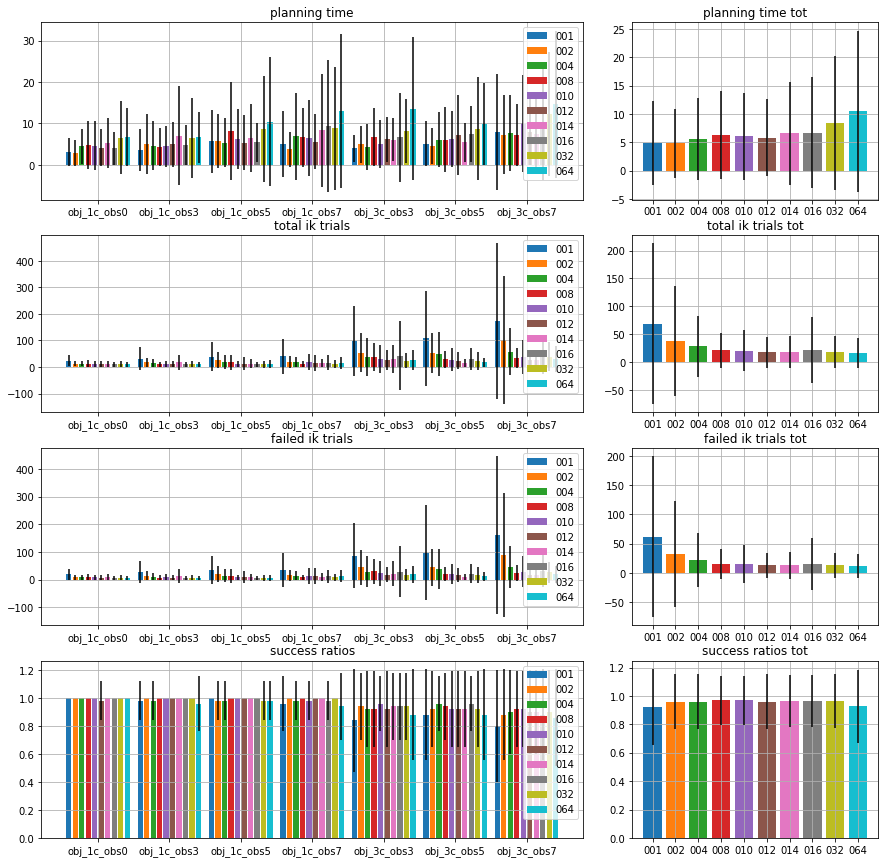

In [5]:
plt.figure(figsize=(15,15))

plt.subplot(4,3,(1, 2))
_ = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS)
plt.title("planning time")
plt.subplot(4,3,3)
time_dict = plot_valid(resdat_all_accum, keys=["plan_time"], CHECKERS=CHECKERS, average_all=True)
plt.title("planning time tot")

plt.subplot(4,3,(4, 5))
_ = plot_valid(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS)
plt.title("total ik trials")
plt.subplot(4,3,6)
_ = plot_valid(resdat_all_accum, keys=["IK_tot"], CHECKERS=CHECKERS, average_all=True)
plt.title("total ik trials tot")

plt.subplot(4,3,(7, 8))
_ = plot_valid(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS)
plt.title("failed ik trials")
plt.subplot(4,3,9)
_ = plot_valid(resdat_all_accum, keys=["failed_IKs"], CHECKERS=CHECKERS, average_all=True)
plt.title("failed ik trials tot")

plt.subplot(4,3,(10, 11))
succ_dict = extract_values(resdat_all_accum, ["success"])
_ = grouped_bar(succ_dict)
plt.title("success ratios")
plt.subplot(4,3,12)
_ = grouped_bar(succ_dict, average_all=True)
plt.title("success ratios tot")

In [6]:
print("="*80)
success_vecs = [np.concatenate(map(lambda x: x["{:03}".format(ik_num)], succ_dict.values())) for ik_num in IK_NUMS]
success_means = map(np.mean, success_vecs)
max_val = np.max(success_means)
max_idc = np.where(success_means==max_val)[0]
print("IK_NUMS: ", "  ".join(map(lambda x:"{:5}".format(x), IK_NUMS)))
print("success: ", "  ".join(map(lambda x:"{:5.03}".format(x), success_means)))
print("best: {} ({:5.3})".format(np.array(IK_NUMS)[max_idc], max_val))
print("-"*80)
time_vecs = [np.concatenate(map(lambda x: x["{:03}".format(ik_num)], time_dict.values())) for ik_num in IK_NUMS]
time_means = np.array(map(np.mean, time_vecs))
min_val = np.min(time_means[max_idc])
min_idc = np.where(time_means[max_idc]==min_val)[0]
print("IK_NUMS: ", "  ".join(map(lambda x:"{:5}".format(x), IK_NUMS)))
print("times  : ", "  ".join(map(lambda x:"{:5.03}".format(x), time_means)))
print("best: {} ({:5.3})".format(np.array(IK_NUMS)[max_idc][min_idc], min_val))
print("="*80)

IK_NUMS:      1      2      4      8     10     12     14     16     32     64
success:  0.923   0.96   0.96  0.969  0.969   0.96  0.966  0.966  0.963  0.929
best: [ 8 10] (0.969)
--------------------------------------------------------------------------------
IK_NUMS:      1      2      4      8     10     12     14     16     32     64
times  :   4.82   4.79   5.59   6.21   6.03    5.8   6.57    6.7    8.4   10.5
best: [10] ( 6.03)


# test loop

In [5]:
for ik_num, res_path in zip(IK_NUMS, RESULT_PATHS):
    common_args[common_args.index("--res_root")+1] = res_path
    common_args[common_args.index("--IK_TRY_NUM")+1] = str(ik_num)
    FILE_OPTION = "obj_1c_obs0"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_1c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs3"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs5"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

    FILE_OPTION = "obj_3c_obs7"
    run_test_loop(FILE_OPTION, I_START, I_END, common_args, CNAME_LIST=CNAME_LIST)

------- 6.0     -------
========== 1 / 50 (eta: 6.0 / 300.4 s) =========
------- 17.7    -------
========== 2 / 50 (eta: 23.7 / 593.0 s) =========
------- 17.1    -------
========== 3 / 50 (eta: 40.8 / 680.7 s) =========
------- 16.3    -------
========== 4 / 50 (eta: 57.2 / 714.4 s) =========
------- 5.8     -------
========== 5 / 50 (eta: 63.0 / 629.7 s) =========
------- 5.9     -------
========== 6 / 50 (eta: 68.9 / 574.2 s) =========
------- 9.0     -------
========== 7 / 50 (eta: 77.9 / 556.6 s) =========
------- 5.9     -------
========== 8 / 50 (eta: 83.9 / 524.1 s) =========
------- 5.5     -------
========== 9 / 50 (eta: 89.4 / 496.4 s) =========
------- 7.0     -------
========== 10 / 50 (eta: 96.4 / 481.9 s) =========
------- 5.9     -------
========== 11 / 50 (eta: 102.3 / 465.0 s) =========
------- 7.2     -------
========== 12 / 50 (eta: 109.5 / 456.3 s) =========
------- 5.6     -------
========== 13 / 50 (eta: 115.2 / 442.9 s) =========
------- 24.4    -------
========

------- 21.5    -------
========== 10 / 50 (eta: 187.3 / 936.7 s) =========
------- 6.5     -------
========== 11 / 50 (eta: 193.8 / 881.0 s) =========
------- 10.2    -------
========== 12 / 50 (eta: 204.1 / 850.2 s) =========
------- 6.2     -------
========== 13 / 50 (eta: 210.2 / 808.7 s) =========
------- 6.0     -------
========== 14 / 50 (eta: 216.3 / 772.3 s) =========
------- 10.3    -------
========== 15 / 50 (eta: 226.6 / 755.2 s) =========
------- 14.0    -------
========== 16 / 50 (eta: 240.6 / 751.8 s) =========
------- 16.0    -------
========== 17 / 50 (eta: 256.6 / 754.7 s) =========
------- 11.5    -------
========== 18 / 50 (eta: 268.1 / 744.7 s) =========
------- 37.4    -------
========== 19 / 50 (eta: 305.5 / 803.9 s) =========
------- 19.6    -------
========== 20 / 50 (eta: 325.1 / 812.7 s) =========
------- 7.0     -------
========== 21 / 50 (eta: 332.1 / 790.7 s) =========
------- 6.4     -------
========== 22 / 50 (eta: 338.6 / 769.4 s) =========
------- 6.3 

------- 6.1     -------
========== 19 / 50 (eta: 197.7 / 520.2 s) =========
------- 7.9     -------
========== 20 / 50 (eta: 205.6 / 514.0 s) =========
------- 105.1   -------
========== 21 / 50 (eta: 310.7 / 739.7 s) =========
------- 6.3     -------
========== 22 / 50 (eta: 317.0 / 720.5 s) =========
------- 6.8     -------
========== 23 / 50 (eta: 323.9 / 704.0 s) =========
------- 12.6    -------
========== 24 / 50 (eta: 336.5 / 701.0 s) =========
------- 61.3    -------
========== 25 / 50 (eta: 397.8 / 795.6 s) =========
------- 7.3     -------
========== 26 / 50 (eta: 405.1 / 779.1 s) =========
------- 8.4     -------
========== 27 / 50 (eta: 413.6 / 765.8 s) =========
------- 12.2    -------
========== 28 / 50 (eta: 425.8 / 760.3 s) =========
------- 6.6     -------
========== 29 / 50 (eta: 432.4 / 745.6 s) =========
------- 7.4     -------
========== 30 / 50 (eta: 439.8 / 733.1 s) =========
------- 11.9    -------
========== 31 / 50 (eta: 451.8 / 728.6 s) =========
------- 11.9

------- 9.9     -------
========== 27 / 50 (eta: 746.5 / 1382.5 s) =========
------- 9.1     -------
========== 28 / 50 (eta: 755.7 / 1349.4 s) =========
------- 90.4    -------
========== 29 / 50 (eta: 846.1 / 1458.7 s) =========
------- 10.8    -------
========== 30 / 50 (eta: 856.9 / 1428.1 s) =========
------- 6.5     -------
========== 31 / 50 (eta: 863.4 / 1392.6 s) =========
------- 16.4    -------
========== 32 / 50 (eta: 879.8 / 1374.7 s) =========
------- 5.8     -------
========== 33 / 50 (eta: 885.6 / 1341.8 s) =========
------- 9.7     -------
========== 34 / 50 (eta: 895.3 / 1316.7 s) =========
------- 23.9    -------
========== 35 / 50 (eta: 919.3 / 1313.2 s) =========
------- 8.1     -------
========== 36 / 50 (eta: 927.4 / 1288.0 s) =========
------- 12.4    -------
========== 37 / 50 (eta: 939.8 / 1270.0 s) =========
------- 6.1     -------
========== 38 / 50 (eta: 945.9 / 1244.6 s) =========
------- 33.6    -------
========== 39 / 50 (eta: 979.5 / 1255.8 s) =========

------- 8.2     -------
========== 35 / 50 (eta: 410.1 / 585.9 s) =========
------- 9.3     -------
========== 36 / 50 (eta: 419.4 / 582.5 s) =========
------- 17.7    -------
========== 37 / 50 (eta: 437.1 / 590.7 s) =========
------- 6.9     -------
========== 38 / 50 (eta: 444.0 / 584.3 s) =========
------- 6.5     -------
========== 39 / 50 (eta: 450.5 / 577.6 s) =========
------- 32.9    -------
========== 40 / 50 (eta: 483.5 / 604.3 s) =========
------- 13.2    -------
========== 41 / 50 (eta: 496.7 / 605.7 s) =========
------- 7.6     -------
========== 42 / 50 (eta: 504.3 / 600.4 s) =========
------- 14.7    -------
========== 43 / 50 (eta: 519.0 / 603.5 s) =========
------- 11.1    -------
========== 44 / 50 (eta: 530.2 / 602.4 s) =========
------- 12.2    -------
========== 45 / 50 (eta: 542.4 / 602.6 s) =========
------- 6.1     -------
========== 46 / 50 (eta: 548.5 / 596.2 s) =========
------- 10.9    -------
========== 47 / 50 (eta: 559.4 / 595.1 s) =========
------- 10.7

------- 13.6    -------
========== 44 / 50 (eta: 527.3 / 599.2 s) =========
------- 19.0    -------
========== 45 / 50 (eta: 546.3 / 607.0 s) =========
------- 5.7     -------
========== 46 / 50 (eta: 552.0 / 600.0 s) =========
------- 5.8     -------
========== 47 / 50 (eta: 557.8 / 593.4 s) =========
------- 6.2     -------
========== 48 / 50 (eta: 564.0 / 587.6 s) =========
------- 19.9    -------
========== 49 / 50 (eta: 584.0 / 595.9 s) =========
------- 5.9     -------
========== 50 / 50 (eta: 589.9 / 589.9 s) =========
------- 15.4    -------
========== 1 / 50 (eta: 15.4 / 770.5 s) =========
------- 15.3    -------
========== 2 / 50 (eta: 30.7 / 766.7 s) =========
------- 5.9     -------
========== 3 / 50 (eta: 36.6 / 609.6 s) =========
------- 10.5    -------
========== 4 / 50 (eta: 47.0 / 587.8 s) =========
------- 15.2    -------
========== 5 / 50 (eta: 62.3 / 622.6 s) =========
------- 6.3     -------
========== 6 / 50 (eta: 68.6 / 571.5 s) =========
------- 22.9    -------


------- 11.5    -------
========== 2 / 50 (eta: 120.1 / 3001.9 s) =========
------- 25.0    -------
========== 3 / 50 (eta: 145.1 / 2418.3 s) =========
------- 20.8    -------
========== 4 / 50 (eta: 165.9 / 2074.2 s) =========
------- 12.7    -------
========== 5 / 50 (eta: 178.6 / 1785.9 s) =========
------- 6.5     -------
========== 6 / 50 (eta: 185.1 / 1542.5 s) =========
------- 13.7    -------
========== 7 / 50 (eta: 198.8 / 1420.3 s) =========
------- 9.3     -------
========== 8 / 50 (eta: 208.2 / 1301.0 s) =========
------- 25.8    -------
========== 9 / 50 (eta: 234.0 / 1299.9 s) =========
------- 30.2    -------
========== 10 / 50 (eta: 264.2 / 1321.2 s) =========
------- 6.6     -------
========== 11 / 50 (eta: 270.8 / 1231.1 s) =========
------- 105.3   -------
========== 12 / 50 (eta: 376.1 / 1567.3 s) =========
------- 112.1   -------
========== 13 / 50 (eta: 488.3 / 1877.9 s) =========
------- 16.5    -------
========== 14 / 50 (eta: 504.8 / 1802.8 s) =========
-------

------- 13.0    -------
========== 10 / 50 (eta: 94.0 / 470.1 s) =========
------- 6.6     -------
========== 11 / 50 (eta: 100.6 / 457.3 s) =========
------- 11.5    -------
========== 12 / 50 (eta: 112.1 / 467.2 s) =========
------- 17.6    -------
========== 13 / 50 (eta: 129.8 / 499.1 s) =========
------- 7.5     -------
========== 14 / 50 (eta: 137.3 / 490.2 s) =========
------- 6.1     -------
========== 15 / 50 (eta: 143.3 / 477.8 s) =========
------- 6.7     -------
========== 16 / 50 (eta: 150.0 / 468.9 s) =========
------- 6.3     -------
========== 17 / 50 (eta: 156.3 / 459.8 s) =========
------- 6.2     -------
========== 18 / 50 (eta: 162.5 / 451.5 s) =========
------- 7.3     -------
========== 19 / 50 (eta: 169.9 / 447.0 s) =========
------- 84.6    -------
========== 20 / 50 (eta: 254.4 / 636.1 s) =========
------- 25.8    -------
========== 21 / 50 (eta: 280.2 / 667.1 s) =========
------- 19.7    -------
========== 22 / 50 (eta: 299.9 / 681.6 s) =========
------- 17.5 

------- 12.1    -------
========== 19 / 50 (eta: 200.0 / 526.4 s) =========
------- 6.2     -------
========== 20 / 50 (eta: 206.2 / 515.6 s) =========
------- 87.0    -------
========== 21 / 50 (eta: 293.3 / 698.3 s) =========
------- 45.7    -------
========== 22 / 50 (eta: 338.9 / 770.3 s) =========
------- 33.8    -------
========== 23 / 50 (eta: 372.7 / 810.3 s) =========
------- 7.1     -------
========== 24 / 50 (eta: 379.9 / 791.4 s) =========
------- 10.2    -------
========== 25 / 50 (eta: 390.1 / 780.2 s) =========
------- 83.9    -------
========== 26 / 50 (eta: 474.0 / 911.5 s) =========
------- 17.4    -------
========== 27 / 50 (eta: 491.4 / 910.0 s) =========
------- 6.6     -------
========== 28 / 50 (eta: 498.0 / 889.3 s) =========
------- 9.4     -------
========== 29 / 50 (eta: 507.5 / 874.9 s) =========
------- 14.0    -------
========== 30 / 50 (eta: 521.5 / 869.1 s) =========
------- 10.1    -------
========== 31 / 50 (eta: 531.6 / 857.4 s) =========
------- 16.0

------- 6.2     -------
========== 28 / 50 (eta: 429.5 / 766.9 s) =========
------- 7.7     -------
========== 29 / 50 (eta: 437.2 / 753.7 s) =========
------- 105.3   -------
========== 30 / 50 (eta: 542.5 / 904.1 s) =========
------- 18.7    -------
========== 31 / 50 (eta: 561.2 / 905.1 s) =========
------- 12.8    -------
========== 32 / 50 (eta: 574.0 / 896.8 s) =========
------- 11.2    -------
========== 33 / 50 (eta: 585.2 / 886.7 s) =========
------- 8.6     -------
========== 34 / 50 (eta: 593.8 / 873.2 s) =========
------- 21.5    -------
========== 35 / 50 (eta: 615.3 / 879.0 s) =========
------- 7.5     -------
========== 36 / 50 (eta: 622.9 / 865.1 s) =========
------- 12.2    -------
========== 37 / 50 (eta: 635.1 / 858.2 s) =========
------- 105.4   -------
========== 38 / 50 (eta: 740.5 / 974.3 s) =========
------- 17.3    -------
========== 39 / 50 (eta: 757.8 / 971.5 s) =========
------- 16.8    -------
========== 40 / 50 (eta: 774.6 / 968.2 s) =========
------- 15.0